<a href="https://colab.research.google.com/github/LingyiC/A-Cross-world-Happiness-Study-and-Website-Deploy/blob/master/Analyzation/Basic_viusalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Work on dataset 2018

In [109]:
# delete _pycache_ folder first
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns #for data visualization
import matplotlib.pyplot as plt  #for data visualization

import warnings            
warnings.filterwarnings("ignore") 

In [0]:

#load data from csv file
data_2016=pd.read_csv('/content/gdrive/My Drive/19 Spring/E6998 Empirical Methods of Data Science/Project code/data/2016.csv')
data_2017=pd.read_csv('/content/gdrive/My Drive/19 Spring/E6998 Empirical Methods of Data Science/Project code/data/2017.csv')
data_2018=pd.read_csv('/content/gdrive/My Drive/19 Spring/E6998 Empirical Methods of Data Science/Project code/data/2018.csv')
data_2019=pd.read_csv('/content/gdrive/My Drive/19 Spring/E6998 Empirical Methods of Data Science/Project code/data/2019.csv')


In [0]:
# unify the header

data_2016.columns=[each.split()[0] if(len(each.split())>2) else each.replace(" ","_") for each in data_2016.columns]
data_2017.columns=[each.split()[0] if(len(each.split())>2) else each.replace(" ","_") for each in data_2017.columns]
data_2018.columns=[each.replace("."," ") for each in data_2018.columns]
data_2018.columns=[each.split()[0] if(len(each.split())>2) else each.replace(" ","_") for each in data_2018.columns]

In [113]:
data_2016.shape

(158, 12)

## Analysis


In [114]:
data_2018.head()

,Country,Region,Happiness_Rank,Happiness_Score,Whisker_high,Whisker_low,Economy,Family,Health,Freedom,Generosity,Trust,Dystopia_Residual
0,Afghanistan,Southern Asia,141,3.794,3.873661,3.714338,0.401477,0.581543,0.180747,0.106180,0.311871,0.061158,2.150801
1,Albania,Central and Eastern Europe,109,4.644,4.752464,4.535536,0.996193,0.803685,0.731160,0.381499,0.201313,0.039864,1.490442
2,Algeria,Middle East and Northern Africa,53,5.872,5.978286,5.765714,1.091864,1.146217,0.617585,0.233336,0.069437,0.146096,2.567604
3,Angola,Sub-Saharan Africa,140,3.795,3.951642,3.638358,0.858428,1.104412,0.049869,0.000000,0.097926,0.069720,1.614482
4,Argentina,Latin America and Caribbean,24,6.599,6.690085,6.507915,1.185295,1.440451,0.695137,0.494519,0.109457,0.059740,2.614005


In [115]:
#getting an overview of our data
data_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 13 columns):
Country              146 non-null object
Region               146 non-null object
Happiness_Rank       146 non-null int64
Happiness_Score      146 non-null float64
Whisker_high         146 non-null float64
Whisker_low          146 non-null float64
Economy              146 non-null float64
Family               146 non-null float64
Health               146 non-null float64
Freedom              146 non-null float64
Generosity           146 non-null float64
Trust                146 non-null float64
Dystopia_Residual    146 non-null float64
dtypes: float64(10), int64(1), object(2)
memory usage: 14.9+ KB


In [116]:
print("Are There Missing Data? :",data_2018.isnull().any().any())
print(data_2018.isnull().sum())

Are There Missing Data? : False
Country              0
Region               0
Happiness_Rank       0
Happiness_Score      0
Whisker_high         0
Whisker_low          0
Economy              0
Family               0
Health               0
Freedom              0
Generosity           0
Trust                0
Dystopia_Residual    0
dtype: int64


In [117]:
print("\n\nRegion in Dataset:\n")
print("There are {} different values\n".format(len(data_2018.Region.unique())))
print(data_2018.Region.unique())



Region in Dataset:

There are 10 different values

['Southern Asia' 'Central and Eastern Europe'
 'Middle East and Northern Africa' 'Sub-Saharan Africa'
 'Latin America and Caribbean' 'Australia and New Zealand'
 'Western Europe' 'Southeastern Asia' 'North America' 'Eastern Asia']


In [143]:
# compute deviation 
import statistics 
# print("Standard Deviation of sample is % s "% (statistics.stdev(sample)))
region_lists=list(data_2018['Region'].unique())
Standard_deviation=[]
for each in region_lists:
    region=data_2018[data_2018['Region']==each]
    region_happiness_rate=statistics.stdev(region.Happiness_Score)
    Standard_deviation.append(region_happiness_rate)
    
data=pd.DataFrame({'region':region_lists,'Standard_deviation':Standard_deviation})
new_index=(data['Standard_deviation'].sort_values(ascending=True)).index.values
sorted_data = data.reindex(new_index)

sorted_data

,region,Standard_deviation
5,Australia and New Zealand,0.021213
8,North America,0.228395
9,Eastern Asia,0.461573
0,Southern Asia,0.499732
3,Sub-Saharan Africa,0.548266
1,Central and Eastern Europe,0.591644
6,Western Europe,0.756891
4,Latin America and Caribbean,0.769469
7,Southeastern Asia,0.865941
2,Middle East and Northern Africa,0.985246


In [118]:
region_lists=list(data_2018['Region'].unique())
region_happiness_ratio=[]
for each in region_lists:
    region=data_2018[data_2018['Region']==each]
    region_happiness_rate=sum(region.Happiness_Score)/len(region)
    region_happiness_ratio.append(region_happiness_rate)
    
data=pd.DataFrame({'region':region_lists,'region_happiness_ratio':region_happiness_ratio})
new_index=(data['region_happiness_ratio'].sort_values(ascending=False)).index.values
sorted_data = data.reindex(new_index)

sorted_data

,region,region_happiness_ratio
5,Australia and New Zealand,7.299000
8,North America,7.154500
6,Western Europe,6.703714
4,Latin America and Caribbean,5.957905
9,Eastern Asia,5.496500
7,Southeastern Asia,5.444875
1,Central and Eastern Europe,5.409931
2,Middle East and Northern Africa,5.369684
0,Southern Asia,4.628429
3,Sub-Saharan Africa,4.121182


In [0]:
region_colors = {'Australia and New Zealand':'salmon',
                 'North America':'orange',
                 'Western Europe':'goldenrod',
                 'Latin America and Caribbean':'yellowgreen',
                 'Eastern Asia':'mediumseagreen',
                 'Southeastern Asia':'darkcyan',
                 'Central and Eastern Europe':'deepskyblue',
                 'Middle East and Northern Africa':'royalblue',
                 'Southern Asia':'mediumorchid',
                 'Sub-Saharan Africa':'hotpink'
    
}
type(region_colors)
colors = []
for i in data_2018['Region']:
    colors.append(region_colors[i])

In [0]:
# region_colors = {'Middle East and Northern Africa':'red',
#                  'Latin America and Caribbean':'green',
#                  'Eastern Asia':'aqua',
#                  'Sub-Saharan Africa':'blue',
#                  'Southeastern Asia':'grey',
#                  'Western Europe':'pink',
#                  'North America':'yellow',
#                  'Australia and New Zealand':'orange',
#                  'Central and Eastern Europe':'purple',
#                  'Southern Asia':'olive'};

# type(region_colors)
# colors = []
# for i in data_2018['Region']:
    
#     colors.append(region_colors[i])

In [0]:
# region_colors = {'Australia and New Zealand':'#d55f58',
#                  'North America':'#d4a854',
#                  'Western Europe':'#b9d95a',
#                  'Latin America and Caribbean':'#69dc56',
#                  'Eastern Asia':'#62d58e11',
#                  'Southeastern Asia':'#5dd0d7',
#                  'Central and Eastern Europe':'#5982d7',
#                  'Middle East and Northern Africa':'#a158d5',
#                  'Southern Asia':'#d5589c',
#                  'Sub-Saharan Africa':'#f062da'
                 
              
    
# }
# type(region_colors)
# colors = []
# for i in data_2018['Region']:
#     print(i)
#     colors.append(region_colors[i])

## World Data Visualization

In [136]:
data_sort = data_2016.sort_values(by=['Happiness_Rank'])
data_sort[0:10]

,Country,Region,Happiness_Rank,Happiness_Score,Standard_Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia_Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


### Happiness rate for different regions (bar)

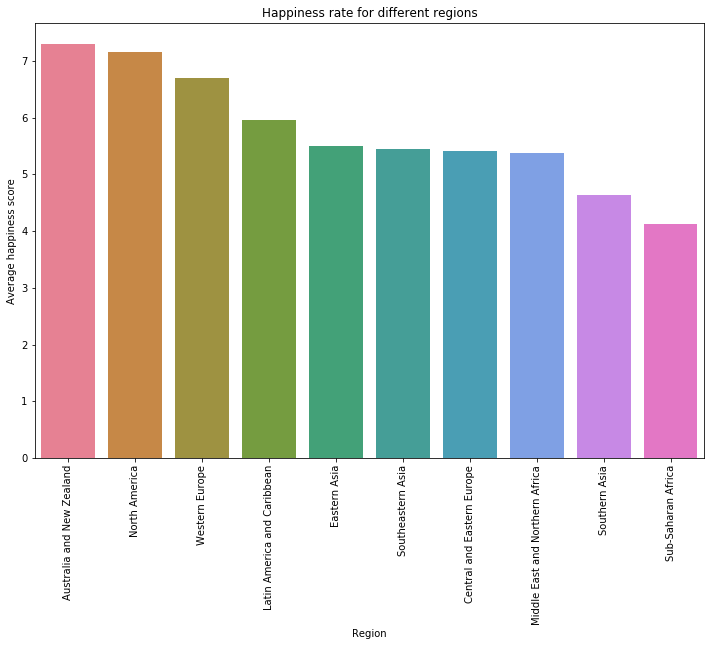

In [122]:
#Visualization
#Create a new figure and make the size (12,8)
plt.figure(figsize=(12,8))
sns.barplot(x=sorted_data['region'], y=sorted_data['region_happiness_ratio'],palette="husl")
# Place the region names at a 90-degree angle.
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average happiness score')
plt.title('Happiness rate for different regions')
plt.show()


In [0]:
import statistics 
def general_analysis(data):
  plt.figure(figsize=(12,8))
#   print(data.describe)
  g = sns.stripplot(x="Region", y="Happiness_Rank", data=data, jitter=True,palette="husl")
  plt.xticks(rotation=90)
  g = sns.boxplot(x="Region", y="Happiness_Rank", data=data,palette="husl")
  
  plt.xticks(rotation=90)


  plt.figure(figsize=(12,8))
  g.yaxis.grid()
  ax = sns.boxplot(x="Region", y="Happiness_Rank", data=data,palette="husl")
  plt.xticks(rotation=90)
  
  # Draw a violinplot with a narrower bandwidth than the default
  plt.figure(figsize=(12,8))
  sns.violinplot(data=data.corr(), palette="Set3", bw=.2, cut=1, linewidth=1)
  # Finalize the figure
  #ax.set(ylim=(-.7, 1.05))
  sns.despine(left=True, bottom=True)
  #plt.figure(figsize=(12,8))
  plt.xticks(rotation=90)
  plt.show()
  
  
  ######
  data_sort = data.sort_values(by=['Happiness_Rank'])
  X = data_sort[['Region','Happiness_Score','Economy', 'Family', 'Health', 'Freedom', 'Generosity','Trust','Dystopia_Residual']]
  data_filter=X.iloc[:,0:10]
  data_filter.columns
  #Incomplete detection will be performed.
  for i, col in enumerate(data_filter.columns.values):
      plt.subplot(4, 3, i+1)
      num = data.shape[0]+1
      plt.scatter(np.arange(1,num), X[col].values.tolist())
      plt.title(col)
      fig, ax = plt.gcf(), plt.gca()
      fig.set_size_inches(10, 10)
      plt.tight_layout()
  plt.show()
  
  

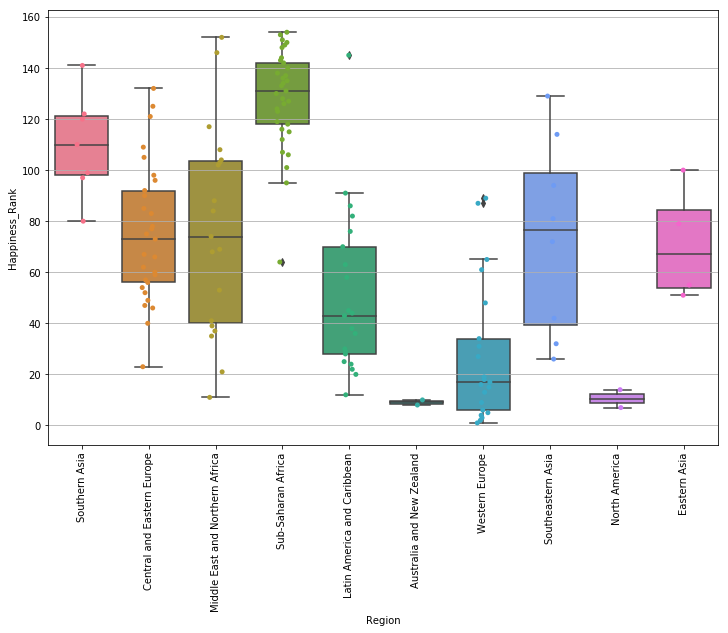

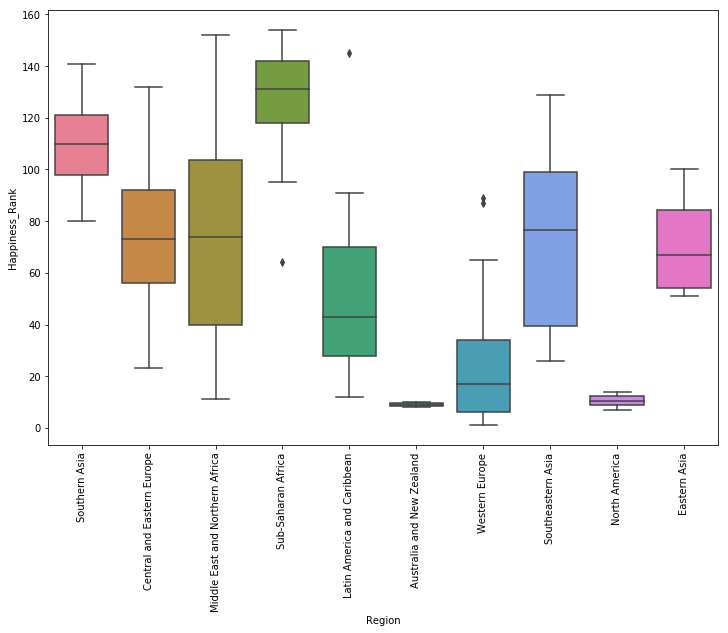

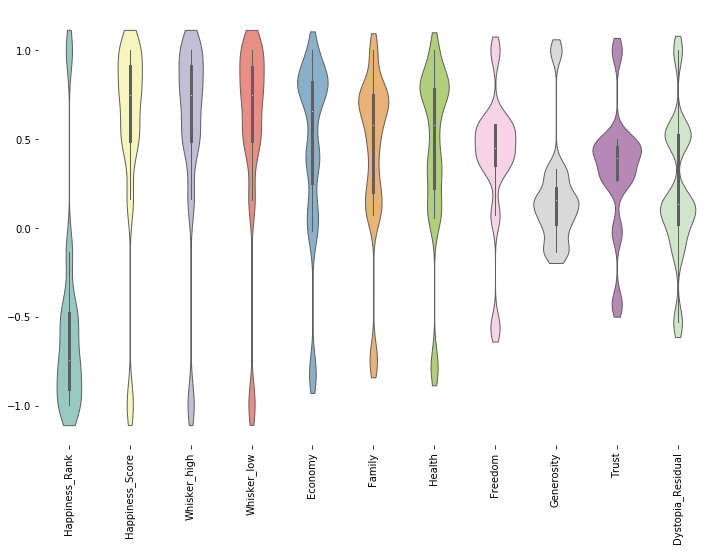

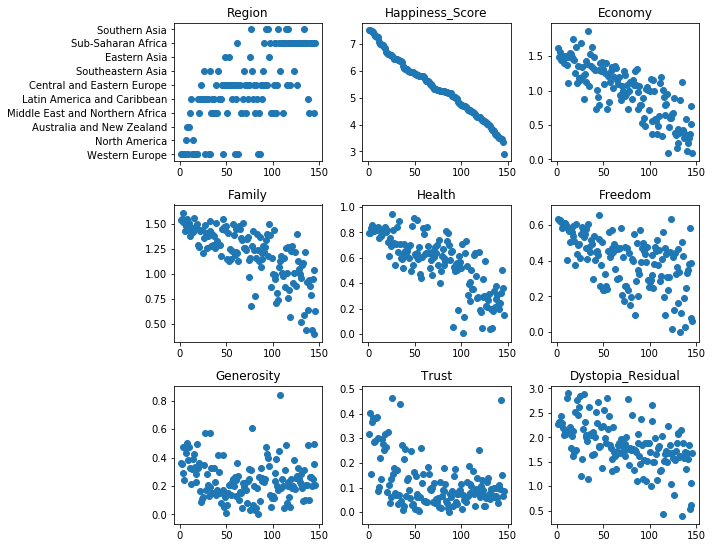

In [0]:
general_analysis(data_2018)

## Economy

### Economy rate for different regions (bar)

In [0]:
region_lists=list(data_2018['Region'].unique())
region_economy_ratio=[]
for each in region_lists:
    region=data_2018[data_2018['Region']==each]
    region_economy_rate=sum(region.Economy)/len(region)
    region_economy_ratio.append(region_economy_rate)
    
data_economy=pd.DataFrame({'region':region_lists,'region_economy_ratio':region_economy_ratio})
new_index_economy=(data_economy['region_economy_ratio'].sort_values(ascending=False)).index.values
sorted_data_economy = data_economy.reindex(new_index_economy)
sorted_data_economy.head()

,region,region_economy_ratio
8,North America,1.512732
6,Western Europe,1.457411
5,Australia and New Zealand,1.445060
9,Eastern Asia,1.231749
2,Middle East and Northern Africa,1.168535


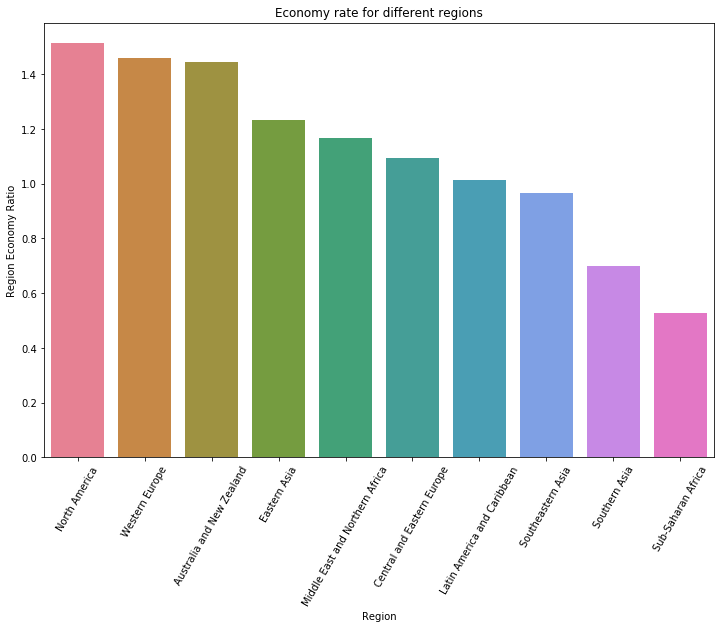

In [0]:
#Visualization
#Create a new figure and make the size (12,10)
f,ax1 = plt.subplots(figsize =(12,8))
sns.barplot(x=sorted_data_economy['region'], y=sorted_data_economy['region_economy_ratio'],palette="husl", ax=ax1)
# Place the region names at a 90-degree angle.
plt.xticks(rotation= 60)
plt.xlabel('Region')
plt.ylabel('Region Economy Ratio')
plt.title('Economy rate for different regions')
plt.show()




Text(0.5, 1.0, 'Correlation between different fearures')

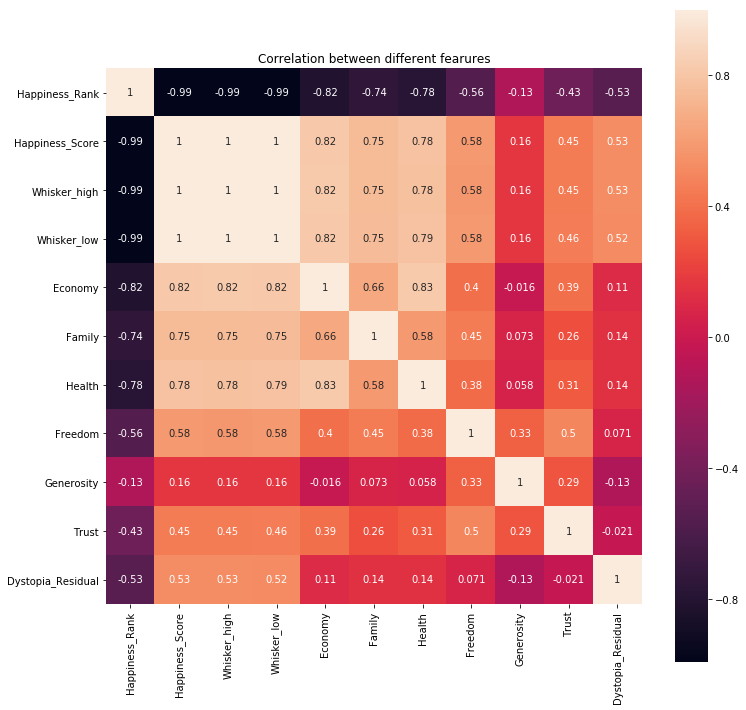

In [0]:
data_2018.corr()
correlation = data_2018.corr()
plt.figure(figsize=(12,12))
sns.heatmap(correlation, vmax=1, square=True,annot=True)
plt.title('Correlation between different fearures')


### Happiness_score vs economy score

In [0]:
import scipy.stats as stats
from matplotlib.lines import Line2D
def ratio_plot(data): 
    region_lists=list(data['Region'].unique())
    region_economy_ratio=[]
    for each in region_lists:
        region=data[data['Region']==each]
        region_economy_rate=sum(region.Economy)/len(region)
        region_economy_ratio.append(region_economy_rate)

    data_economy=pd.DataFrame({'region':region_lists,'region_economy_ratio':region_economy_ratio})
    new_index_economy=(data_economy['region_economy_ratio'].sort_values(ascending=False)).index.values
    sorted_data_economy = data_economy.reindex(new_index_economy)
    sorted_data_economy.head()

    region_lists=list(data['Region'].unique())
    region_happiness_ratio=[]
    for each in region_lists:
        region=data[data['Region']==each]
        region_happiness_rate=sum(region.Happiness_Score)/len(region)
        region_happiness_ratio.append(region_happiness_rate)

    data_happiness=pd.DataFrame({'region':region_lists,'region_happiness_ratio':region_happiness_ratio})
    new_index=(data_happiness['region_happiness_ratio'].sort_values(ascending=False)).index.values
    sorted_data = data_happiness.reindex(new_index)


    sorted_data.region_happiness_ratio = sorted_data.region_happiness_ratio/max(sorted_data.region_happiness_ratio)
    sorted_data_economy.region_economy_ratio = sorted_data_economy.region_economy_ratio/max(sorted_data_economy.region_economy_ratio)
    data_plot = pd.concat([sorted_data,sorted_data_economy.region_economy_ratio],axis = 1)
    data_plot.sort_values("region_happiness_ratio",inplace = True)
# '''
# Happines Score vs. Economy Score
# '''
    f,ax1 = plt.subplots(figsize = (12,8))
    fig1 = sns.pointplot(x = "region",y = "region_economy_ratio",data = data_plot,color = 'deepskyblue',label = "Happiness Score Ratio of Given Regions", alpha = 0.7)
    #fig1.legend(labels = ["Economy Ratio of Given Regions","Happiness Score Ratio of Given Regions"],loc = 2)
    fig2 = sns.pointplot(x = "region",y = "region_happiness_ratio", data = data_plot,color = 'orangered', label = "Economy Ratio of Given Regions", alpha = 0.7)
    custom_lines = [Line2D([0], [0], color="orangered", lw=4),
                    Line2D([0], [0], color="deepskyblue", lw=4)]
    plt.legend(custom_lines, ['Happiness Score Ratio of Given Regions', 'Economy Ratio of Given Regions'])
    # plt.text(5.5,0.35, "Happiness Score Ratio of Given Regions",color = 'orangered',fontsize = 13)
    # plt.text(5.5,0.33, "Economy Ratio of Given Regions",color = 'deepskyblue',fontsize = 13)
    plt.xlabel('Regions', fontsize = 10)
    plt.ylabel('Values', fontsize = 10)

    plt.xticks(rotation = 90)
    plt.title('Happines Score vs. Economy Score in {}'.format(2016), fontsize = 12)
    plt.grid()

    # plt.legend(labels = ["Economy Ratio of Given Regions","Happiness Score Ratio of Given Regions"])
    plt.show()
# '''
# state.pearsonr
# '''
    # plt.title('Happines Score vs. Economy Score', fontsize = 12)
    g = sns.jointplot(data_plot.region_economy_ratio, data_plot.region_happiness_ratio, kind = "kde", height = 7)
    g.annotate(stats.pearsonr)
    
    plt.show()
# '''
# joint plot 
# '''
    #plt.title('Happines Score vs. Economy Score', fontsize = 12)
    g = (sns.jointplot('region_economy_ratio', 'region_happiness_ratio',data = data_plot, color = 'deepskyblue', ratio = 3))
    
# lmplot
# This lmplot shows us the relationship between hapiness score and economy.
    sns.lmplot('region_economy_ratio', 'region_happiness_ratio',data = data_plot)
    #plt.title('Happines Score vs. Economy Score', fontsize = 12)
    plt.show()
    
# violin
    f,ax1 = plt.subplots(figsize = (12,8))
    sns.violinplot(x = data.Region, y = data['Economy'])
    plt.xticks(rotation = 90)
    plt.title('Happines Score vs. Economy Score in {}'.format(2016), fontsize = 12)
    plt.show()
    # test 
    sns.pairplot(data.iloc[:,[0,5,6,7,8]])
    #plt.title('Happines Score vs. Economy Score', fontsize = 12)
    plt.show()
   

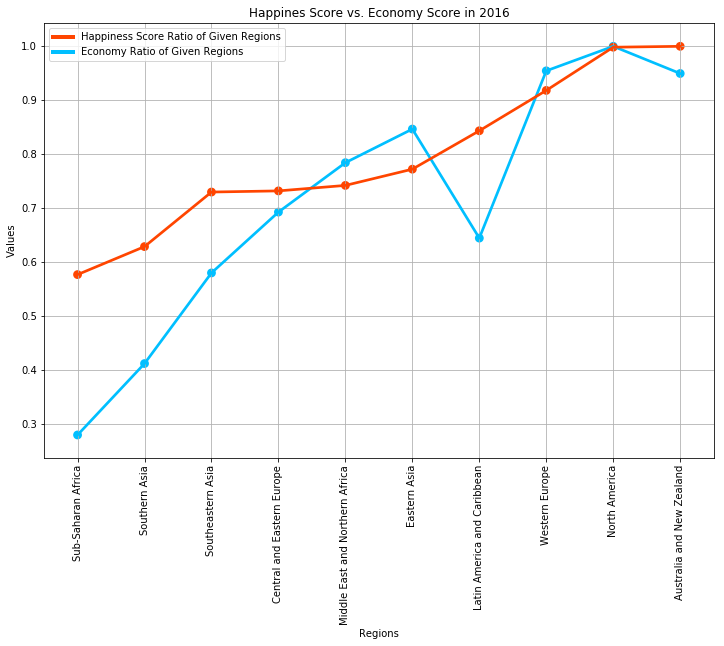

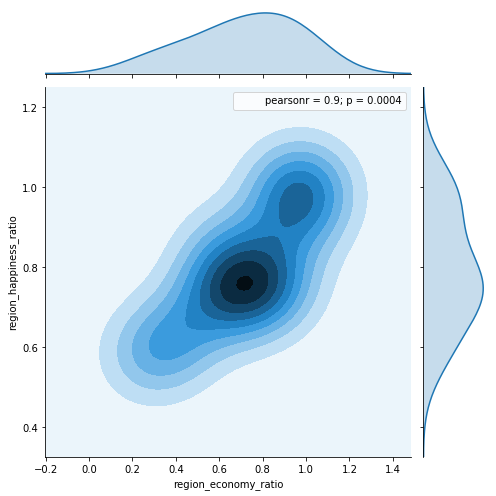

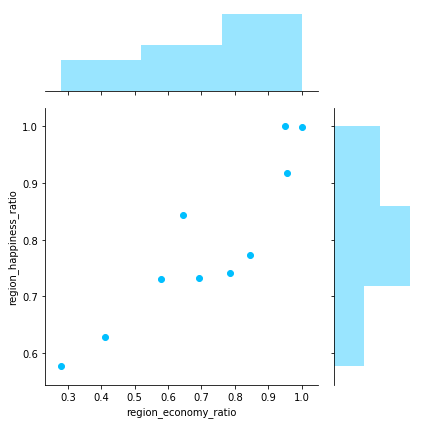

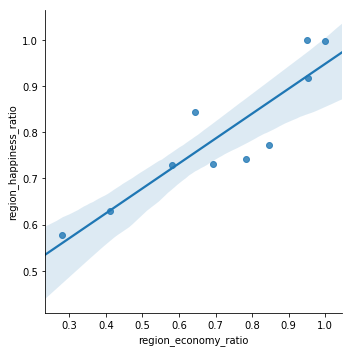

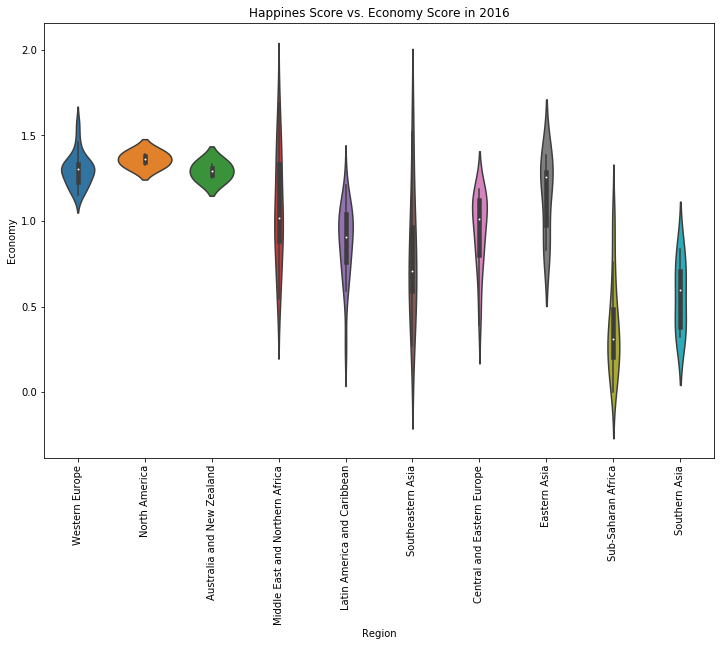

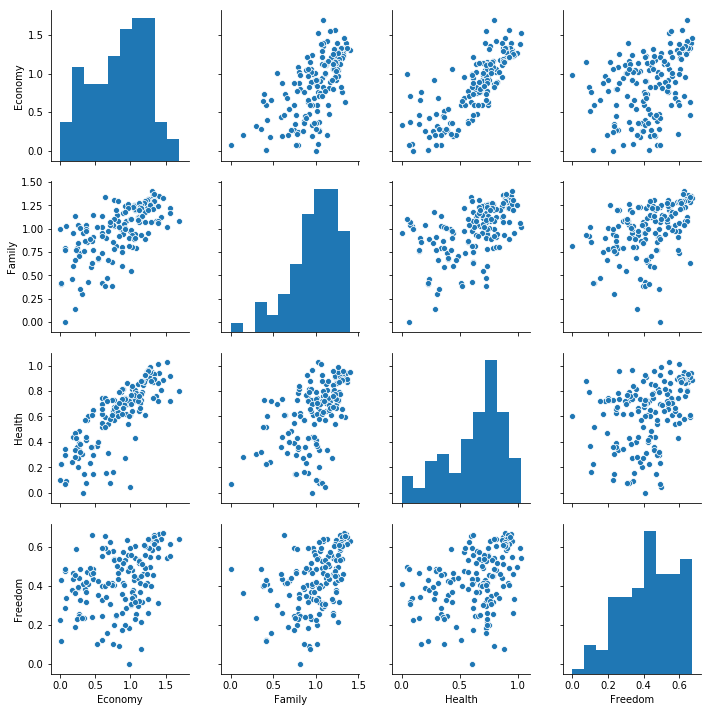

In [0]:
ratio_plot(data_2016)

In [0]:
import scipy.stats as stats
from matplotlib.lines import Line2D
def health_ratio_plot(data): 
    region_lists=list(data['Region'].unique())
    region_health_ratio=[]
    for each in region_lists:
        region=data[data['Region']==each]
        region_health_rate=sum(region.Health)/len(region)
        region_health_ratio.append(region_health_rate)

    data_health=pd.DataFrame({'region':region_lists,'region_health_ratio':region_health_ratio})
    new_index_health=(data_health['region_health_ratio'].sort_values(ascending=False)).index.values
    sorted_data_health = data_health.reindex(new_index_health)
    sorted_data_health.head()

    region_lists=list(data['Region'].unique())
    region_happiness_ratio=[]
    for each in region_lists:
        region=data[data['Region']==each]
        region_happiness_rate=sum(region.Happiness_Score)/len(region)
        region_happiness_ratio.append(region_happiness_rate)

    data_happiness=pd.DataFrame({'region':region_lists,'region_happiness_ratio':region_happiness_ratio})
    new_index=(data_happiness['region_happiness_ratio'].sort_values(ascending=False)).index.values
    sorted_data = data_happiness.reindex(new_index)


    sorted_data.region_happiness_ratio = sorted_data.region_happiness_ratio/max(sorted_data.region_happiness_ratio)
    sorted_data_health.region_health_ratio = sorted_data_health.region_health_ratio/max(sorted_data_health.region_health_ratio)
    data_plot = pd.concat([sorted_data,sorted_data_health.region_health_ratio],axis = 1)
    data_plot.sort_values("region_happiness_ratio",inplace = True)
# '''
# Happines Score vs. health Score
# '''
    f,ax1 = plt.subplots(figsize = (12,8))
    fig1 = sns.pointplot(x = "region",y = "region_health_ratio",data = data_plot,color = 'deepskyblue',label = "Happiness Score Ratio of Given Regions", alpha = 0.7)
    #fig1.legend(labels = ["health Ratio of Given Regions","Happiness Score Ratio of Given Regions"],loc = 2)
    fig2 = sns.pointplot(x = "region",y = "region_happiness_ratio", data = data_plot,color = 'orangered', label = "health Ratio of Given Regions", alpha = 0.7)
    custom_lines = [Line2D([0], [0], color="orangered", lw=4),
                    Line2D([0], [0], color="deepskyblue", lw=4)]
    plt.legend(custom_lines, ['Happiness Score Ratio of Given Regions', 'Health Ratio of Given Regions'])
    # plt.text(5.5,0.35, "Happiness Score Ratio of Given Regions",color = 'orangered',fontsize = 13)
    # plt.text(5.5,0.33, "health Ratio of Given Regions",color = 'deepskyblue',fontsize = 13)
    plt.xlabel('Regions', fontsize = 10)
    plt.ylabel('Values', fontsize = 10)

    plt.xticks(rotation = 90)
    plt.title('Happines Score vs. health Score in {}'.format(2016), fontsize = 12)
    plt.grid()

    # plt.legend(labels = ["health Ratio of Given Regions","Happiness Score Ratio of Given Regions"])
    plt.show()
# '''
# state.pearsonr
# '''
    # plt.title('Happines Score vs. health Score', fontsize = 12)
    g = sns.jointplot(data_plot.region_health_ratio, data_plot.region_happiness_ratio, kind = "kde", height = 7)
    g.annotate(stats.pearsonr)
    
    plt.show()
# '''
# joint plot 
# '''
    #plt.title('Happines Score vs. health Score', fontsize = 12)
    g = (sns.jointplot('region_health_ratio', 'region_happiness_ratio',data = data_plot, color = 'deepskyblue', ratio = 3))
    
# lmplot
# This lmplot shows us the relationship between hapiness score and health.
    sns.lmplot('region_health_ratio', 'region_happiness_ratio',data = data_plot)
    #plt.title('Happines Score vs. health Score', fontsize = 12)
    plt.show()
    
# violin
    f,ax1 = plt.subplots(figsize = (12,8))
    sns.violinplot(x = data.Region, y = data['Health'])
    plt.xticks(rotation = 90)
    plt.title('Happines Score vs. health Score in {}'.format(2016), fontsize = 12)
    plt.show()
    # test 
    sns.pairplot(data.iloc[:,[0,5,6,7,8]])
    #plt.title('Happines Score vs. health Score', fontsize = 12)
    plt.show()
   

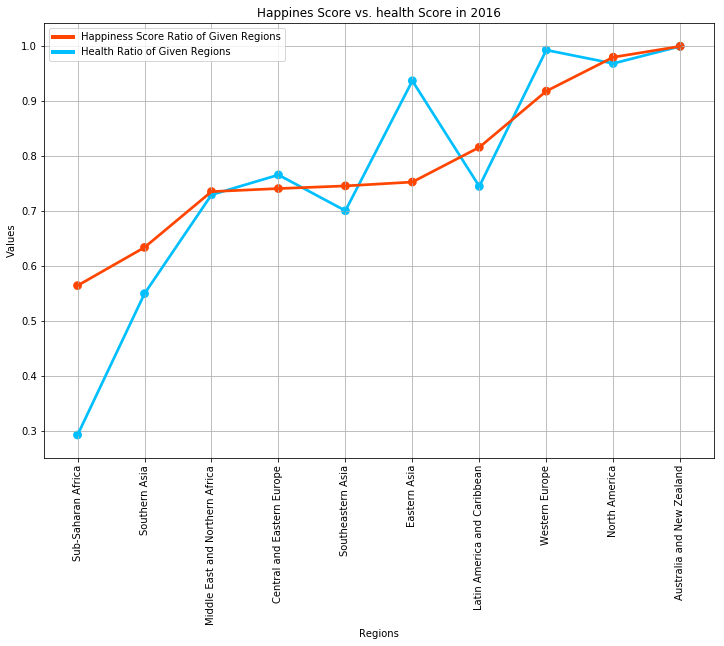

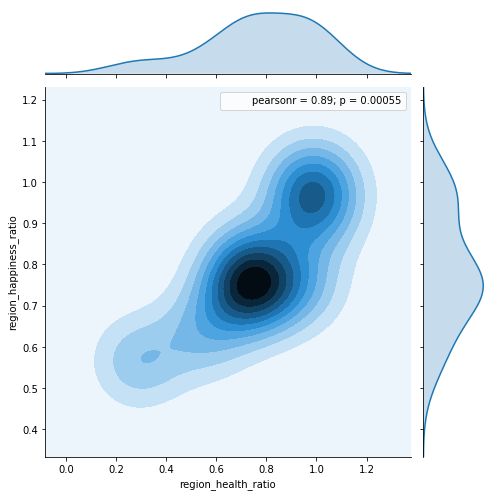

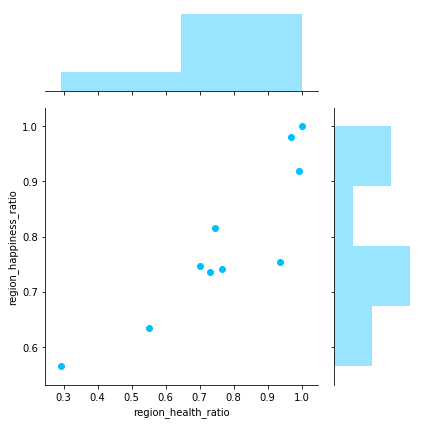

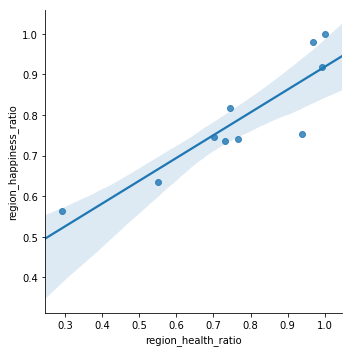

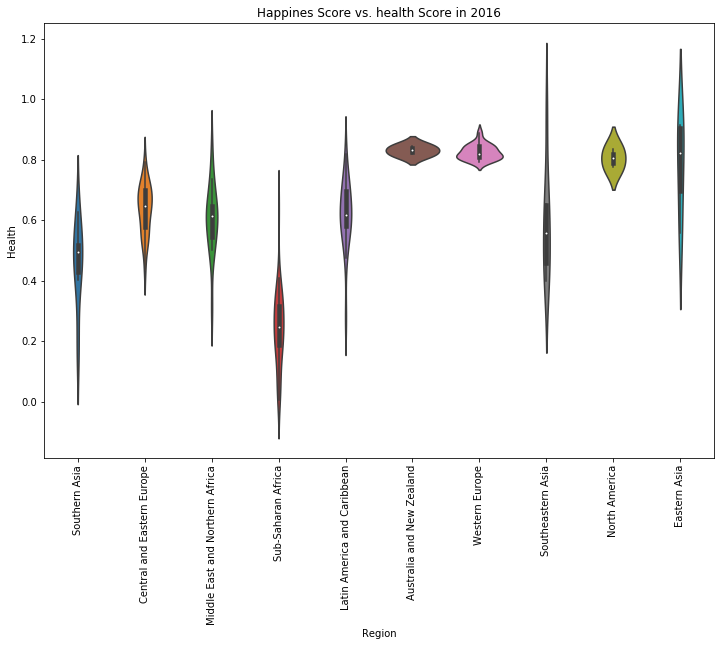

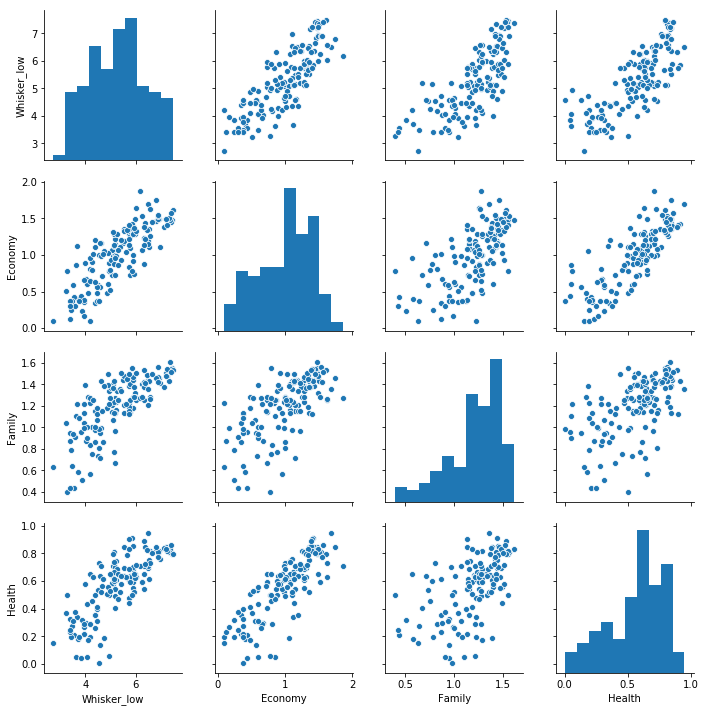

In [0]:
health_ratio_plot(data_2018)

In [0]:
import scipy.stats as stats
from matplotlib.lines import Line2D
def health_family_ratio_plot(data): 
    region_lists=list(data['Region'].unique())
    region_health_ratio=[]
    for each in region_lists:
        region=data[data['Region']==each]
        region_health_rate=sum(region.Health)/len(region)
        region_health_ratio.append(region_health_rate)

    data_health=pd.DataFrame({'region':region_lists,'region_health_ratio':region_health_ratio})
    new_index_health=(data_health['region_health_ratio'].sort_values(ascending=False)).index.values
    sorted_data_health = data_health.reindex(new_index_health)
    sorted_data_health.head()

    region_lists=list(data['Region'].unique())
    region_family_ratio=[]
    for each in region_lists:
        region=data[data['Region']==each]
        region_family_rate=sum(region.Family)/len(region)
        region_family_ratio.append(region_family_rate)

    data_family=pd.DataFrame({'region':region_lists,'region_family_ratio':region_family_ratio})
    new_index=(data_family['region_family_ratio'].sort_values(ascending=False)).index.values
    sorted_data = data_family.reindex(new_index)


    sorted_data.region_family_ratio = sorted_data.region_family_ratio/max(sorted_data.region_family_ratio)
    sorted_data_health.region_health_ratio = sorted_data_health.region_health_ratio/max(sorted_data_health.region_health_ratio)
    data_plot = pd.concat([sorted_data,sorted_data_health.region_health_ratio],axis = 1)
    data_plot.sort_values("region_family_ratio",inplace = True)
# '''
# Happines Score vs. health Score
# '''
    f,ax1 = plt.subplots(figsize = (12,8))
    fig1 = sns.pointplot(x = "region",y = "region_health_ratio",data = data_plot,color = 'deepskyblue',label = "Family Score Ratio of Given Regions", alpha = 0.7)
    #fig1.legend(labels = ["health Ratio of Given Regions","Family Score Ratio of Given Regions"],loc = 2)
    fig2 = sns.pointplot(x = "region",y = "region_family_ratio", data = data_plot,color = 'orangered', label = "health Ratio of Given Regions", alpha = 0.7)
    custom_lines = [Line2D([0], [0], color="orangered", lw=4),
                    Line2D([0], [0], color="deepskyblue", lw=4)]
    plt.legend(custom_lines, ['Family Score Ratio of Given Regions', 'Health Ratio of Given Regions'])
    # plt.text(5.5,0.35, "Family Score Ratio of Given Regions",color = 'orangered',fontsize = 13)
    # plt.text(5.5,0.33, "health Ratio of Given Regions",color = 'deepskyblue',fontsize = 13)
    plt.xlabel('Regions', fontsize = 10)
    plt.ylabel('Values', fontsize = 10)

    plt.xticks(rotation = 90)
    plt.title('Fmaily Score vs. Health Score in {}'.format(2018), fontsize = 12)
    plt.grid()

    # plt.legend(labels = ["health Ratio of Given Regions","Family Score Ratio of Given Regions"])
    plt.show()
# '''
# state.pearsonr
# '''
    # plt.title('Happines Score vs. health Score', fontsize = 12)
    g = sns.jointplot(data_plot.region_health_ratio, data_plot.region_family_ratio, kind = "kde", height = 7)
    g.annotate(stats.pearsonr)
    
    plt.show()
# '''
# joint plot 
# '''
    #plt.title('Happines Score vs. health Score', fontsize = 12)
    g = (sns.jointplot('region_health_ratio', 'region_family_ratio',data = data_plot, color = 'deepskyblue', ratio = 3))
    
# lmplot
# This lmplot shows us the relationship between hapiness score and health.
    sns.lmplot('region_health_ratio', 'region_family_ratio',data = data_plot)
    #plt.title('Happines Score vs. health Score', fontsize = 12)
    plt.show()
    
# violin
    f,ax1 = plt.subplots(figsize = (12,8))
    sns.violinplot(x = data.Region, y = data['Health'])
    plt.xticks(rotation = 90)
    plt.title('Fmaily Score vs. health Score in {}'.format(2016), fontsize = 12)
    plt.show()
    # test 
    sns.pairplot(data.iloc[:,[0,5,6,7,8]])
    #plt.title('Happines Score vs. health Score', fontsize = 12)
    plt.show()
   

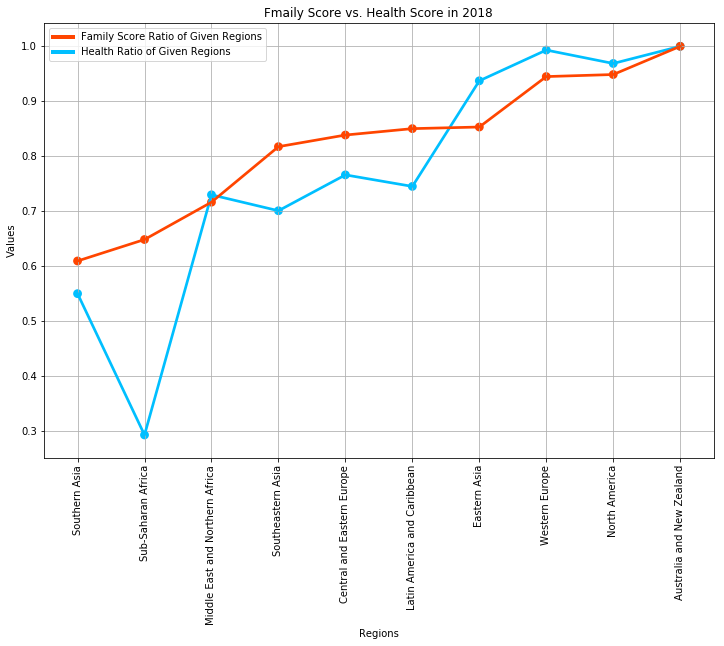

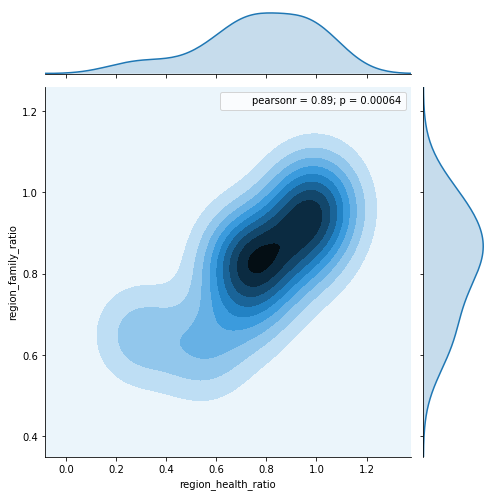

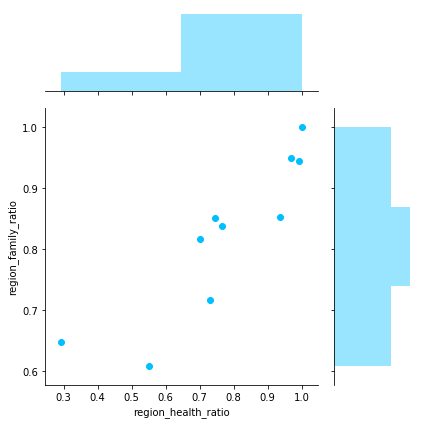

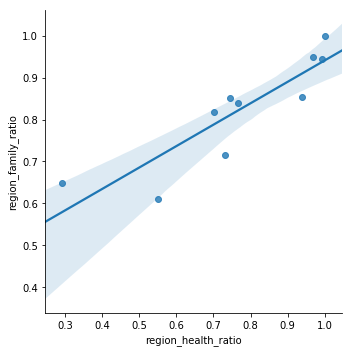

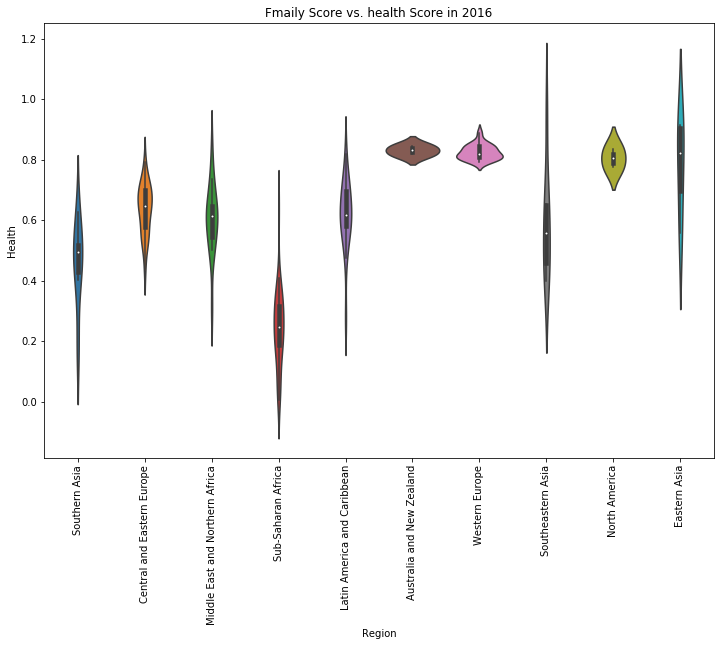

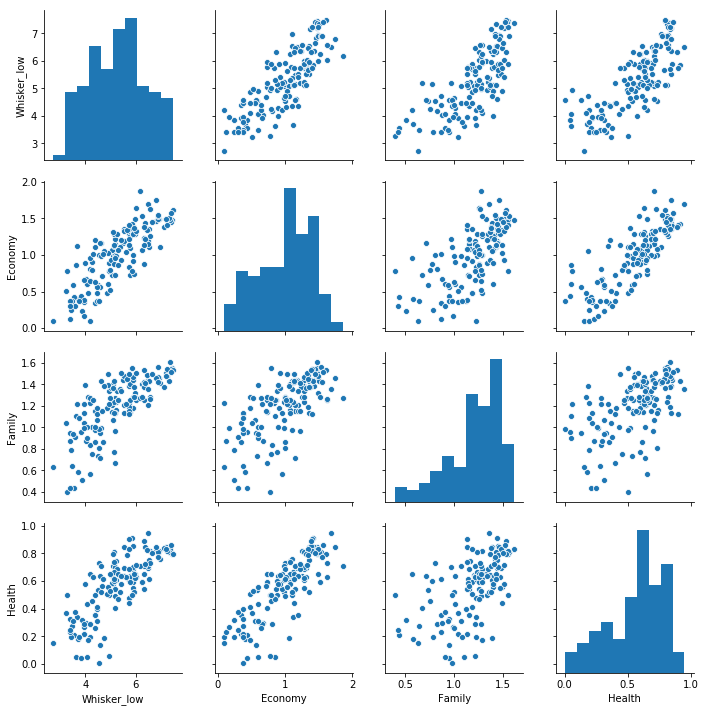

In [0]:
health_family_ratio_plot(data_2018)

In [0]:
import scipy.stats as stats
from matplotlib.lines import Line2D
def economy_family_ratio_plot(data): 
    region_lists=list(data['Region'].unique())
    region_economy_ratio=[]
    for each in region_lists:
        region=data[data['Region']==each]
        region_economy_rate=sum(region.Economy)/len(region)
        region_economy_ratio.append(region_economy_rate)

    data_economy=pd.DataFrame({'region':region_lists,'region_economy_ratio':region_economy_ratio})
    new_index_economy=(data_economy['region_economy_ratio'].sort_values(ascending=False)).index.values
    sorted_data_economy = data_economy.reindex(new_index_economy)
    sorted_data_economy.head()

    region_lists=list(data['Region'].unique())
    region_family_ratio=[]
    for each in region_lists:
        region=data[data['Region']==each]
        region_family_rate=sum(region.Family)/len(region)
        region_family_ratio.append(region_family_rate)

    data_family=pd.DataFrame({'region':region_lists,'region_family_ratio':region_family_ratio})
    new_index=(data_family['region_family_ratio'].sort_values(ascending=False)).index.values
    sorted_data = data_family.reindex(new_index)


    sorted_data.region_family_ratio = sorted_data.region_family_ratio/max(sorted_data.region_family_ratio)
    sorted_data_economy.region_economy_ratio = sorted_data_economy.region_economy_ratio/max(sorted_data_economy.region_economy_ratio)
    data_plot = pd.concat([sorted_data,sorted_data_economy.region_economy_ratio],axis = 1)
    data_plot.sort_values("region_family_ratio",inplace = True)
# '''
# Happines Score vs. Economy Score
# '''
    f,ax1 = plt.subplots(figsize = (12,8))
    fig1 = sns.pointplot(x = "region",y = "region_economy_ratio",data = data_plot,color = 'deepskyblue',label = "Family Score Ratio of Given Regions", alpha = 0.7)
    #fig1.legend(labels = ["Economy Ratio of Given Regions","Family Score Ratio of Given Regions"],loc = 2)
    fig2 = sns.pointplot(x = "region",y = "region_family_ratio", data = data_plot,color = 'orangered', label = "Economy Ratio of Given Regions", alpha = 0.7)
    custom_lines = [Line2D([0], [0], color="orangered", lw=4),
                    Line2D([0], [0], color="deepskyblue", lw=4)]
    plt.legend(custom_lines, ['Family Score Ratio of Given Regions', 'Economy Ratio of Given Regions'])
    # plt.text(5.5,0.35, "Family Score Ratio of Given Regions",color = 'orangered',fontsize = 13)
    # plt.text(5.5,0.33, "Economy Ratio of Given Regions",color = 'deepskyblue',fontsize = 13)
    plt.xlabel('Regions', fontsize = 10)
    plt.ylabel('Values', fontsize = 10)

    plt.xticks(rotation = 90)
    plt.title('Happines Score vs. Economy Score in {}'.format(2016), fontsize = 12)
    plt.grid()

    # plt.legend(labels = ["Economy Ratio of Given Regions","Family Score Ratio of Given Regions"])
    plt.show()
# '''
# state.pearsonr
# '''
    # plt.title('Happines Score vs. Economy Score', fontsize = 12)
    g = sns.jointplot(data_plot.region_economy_ratio, data_plot.region_family_ratio, kind = "kde", height = 7)
    g.annotate(stats.pearsonr)
    
    plt.show()
# '''
# joint plot 
# '''
    #plt.title('Happines Score vs. Economy Score', fontsize = 12)
    g = (sns.jointplot('region_economy_ratio', 'region_family_ratio',data = data_plot, color = 'deepskyblue', ratio = 3))
    
# lmplot
# This lmplot shows us the relationship between hapiness score and economy.
    sns.lmplot('region_economy_ratio', 'region_family_ratio',data = data_plot)
    #plt.title('Happines Score vs. Economy Score', fontsize = 12)
    plt.show()
    
# violin
    f,ax1 = plt.subplots(figsize = (12,8))
    sns.violinplot(x = data.Region, y = data['Economy'])
    plt.xticks(rotation = 90)
    plt.title('Happines Score vs. Economy Score in {}'.format(2016), fontsize = 12)
    plt.show()
    # test 
    sns.pairplot(data.iloc[:,[0,5,6,7,8]])
    #plt.title('Happines Score vs. Economy Score', fontsize = 12)
    plt.show()
   

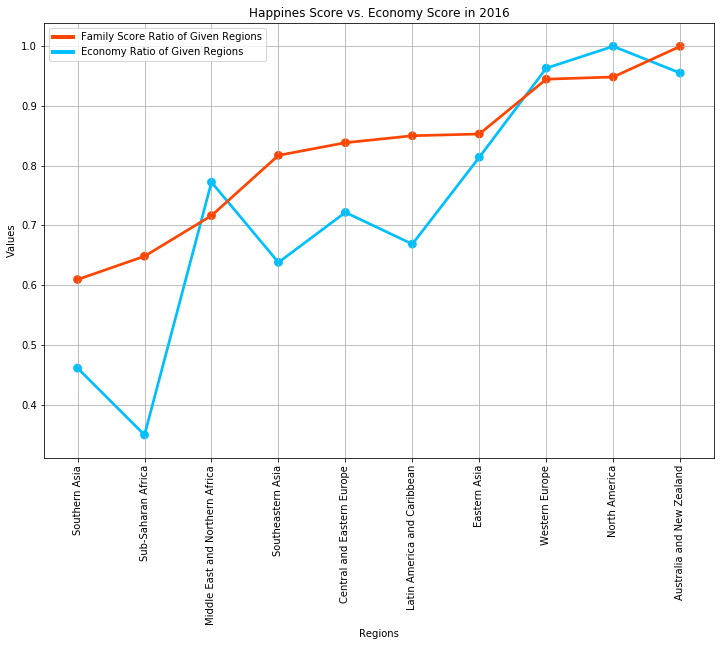

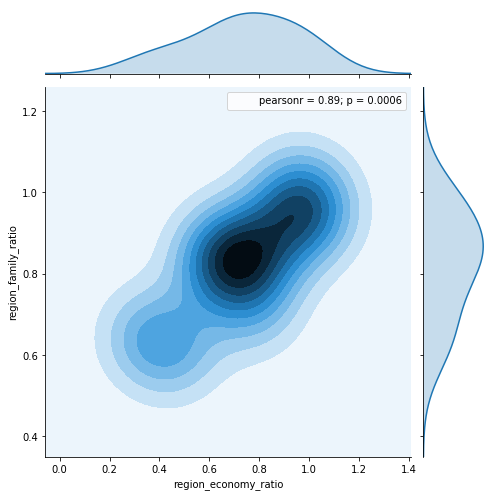

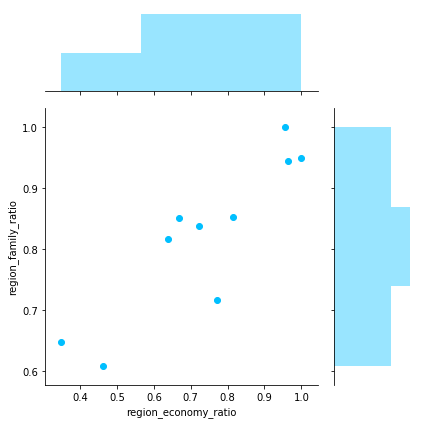

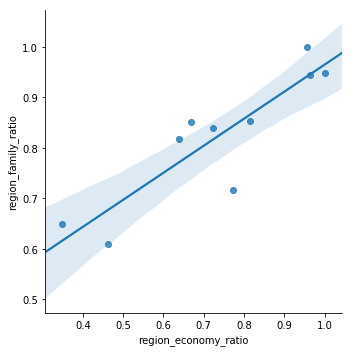

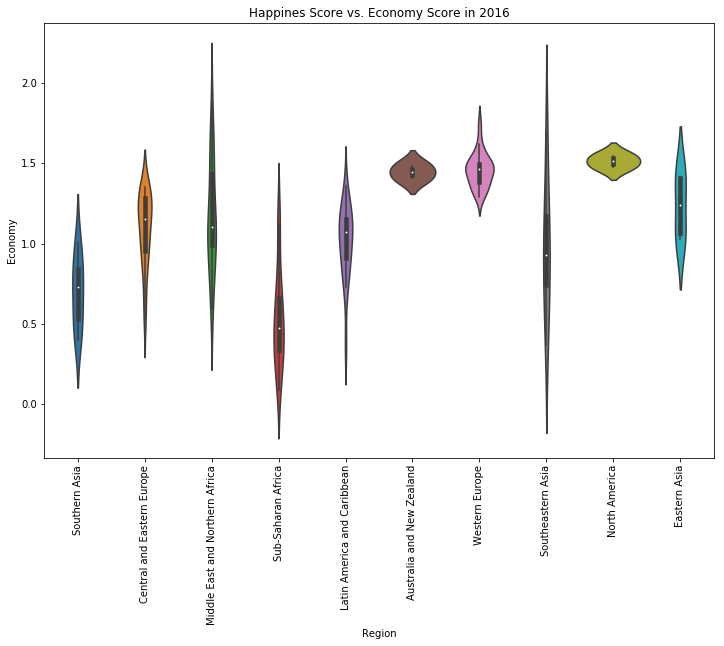

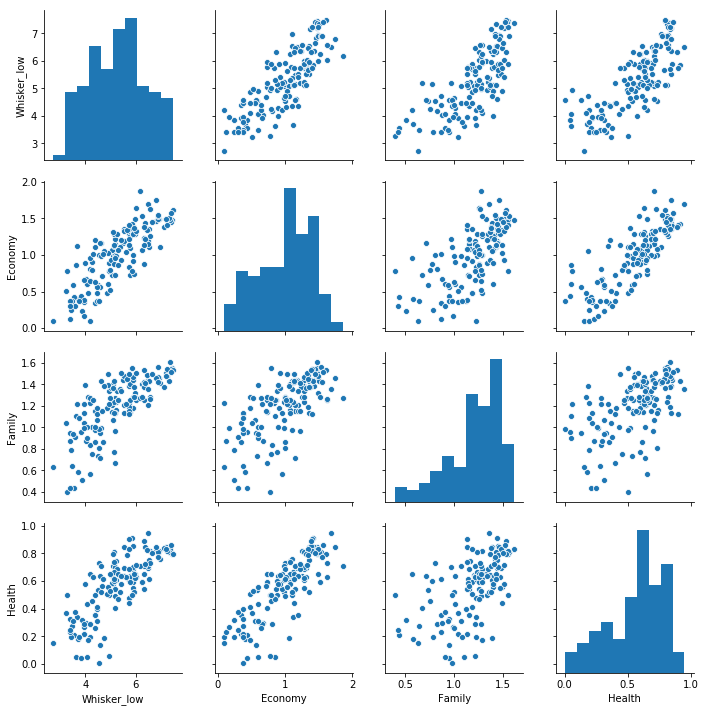

In [0]:
economy_family_ratio_plot(data_2018)

In [0]:
import scipy.stats as stats
from matplotlib.lines import Line2D
def economy_health_ratio_plot(data): 
    region_lists=list(data['Region'].unique())
    region_economy_ratio=[]
    for each in region_lists:
        region=data[data['Region']==each]
        region_economy_rate=sum(region.Economy)/len(region)
        region_economy_ratio.append(region_economy_rate)

    data_economy=pd.DataFrame({'region':region_lists,'region_economy_ratio':region_economy_ratio})
    new_index_economy=(data_economy['region_economy_ratio'].sort_values(ascending=False)).index.values
    sorted_data_economy = data_economy.reindex(new_index_economy)
    sorted_data_economy.head()

    region_lists=list(data['Region'].unique())
    region_health_ratio=[]
    for each in region_lists:
        region=data[data['Region']==each]
        region_health_rate=sum(region.Health)/len(region)
        region_health_ratio.append(region_health_rate)

    data_health=pd.DataFrame({'region':region_lists,'region_health_ratio':region_health_ratio})
    new_index=(data_health['region_health_ratio'].sort_values(ascending=False)).index.values
    sorted_data = data_health.reindex(new_index)


    sorted_data.region_health_ratio = sorted_data.region_health_ratio/max(sorted_data.region_health_ratio)
    sorted_data_economy.region_economy_ratio = sorted_data_economy.region_economy_ratio/max(sorted_data_economy.region_economy_ratio)
    data_plot = pd.concat([sorted_data,sorted_data_economy.region_economy_ratio],axis = 1)
    data_plot.sort_values("region_health_ratio",inplace = True)
# '''
# Happines Score vs. Economy Score
# '''
    f,ax1 = plt.subplots(figsize = (12,8))
    fig1 = sns.pointplot(x = "region",y = "region_economy_ratio",data = data_plot,color = 'deepskyblue',label = "Health Score Ratio of Given Regions", alpha = 0.7)
    #fig1.legend(labels = ["Economy Ratio of Given Regions","Health Score Ratio of Given Regions"],loc = 2)
    fig2 = sns.pointplot(x = "region",y = "region_health_ratio", data = data_plot,color = 'orangered', label = "Economy Ratio of Given Regions", alpha = 0.7)
    custom_lines = [Line2D([0], [0], color="orangered", lw=4),
                    Line2D([0], [0], color="deepskyblue", lw=4)]
    plt.legend(custom_lines, ['Health Score Ratio of Given Regions', 'Economy Ratio of Given Regions'])
    # plt.text(5.5,0.35, "Health Score Ratio of Given Regions",color = 'orangered',fontsize = 13)
    # plt.text(5.5,0.33, "Economy Ratio of Given Regions",color = 'deepskyblue',fontsize = 13)
    plt.xlabel('Regions', fontsize = 10)
    plt.ylabel('Values', fontsize = 10)

    plt.xticks(rotation = 90)
    plt.title('Happines Score vs. Economy Score in {}'.format(2016), fontsize = 12)
    plt.grid()

    # plt.legend(labels = ["Economy Ratio of Given Regions","Health Score Ratio of Given Regions"])
    plt.show()
# '''
# state.pearsonr
# '''
    # plt.title('Happines Score vs. Economy Score', fontsize = 12)
    g = sns.jointplot(data_plot.region_economy_ratio, data_plot.region_health_ratio, kind = "kde", height = 7)
    g.annotate(stats.pearsonr)
    
    plt.show()
# '''
# joint plot 
# '''
    #plt.title('Happines Score vs. Economy Score', fontsize = 12)
    g = (sns.jointplot('region_economy_ratio', 'region_health_ratio',data = data_plot, color = 'deepskyblue', ratio = 3))
    
# lmplot
# This lmplot shows us the relationship between hapiness score and economy.
    sns.lmplot('region_economy_ratio', 'region_health_ratio',data = data_plot)
    #plt.title('Happines Score vs. Economy Score', fontsize = 12)
    plt.show()
    
# violin
    f,ax1 = plt.subplots(figsize = (12,8))
    sns.violinplot(x = data.Region, y = data['Economy'])
    plt.xticks(rotation = 90)
    plt.title('Happines Score vs. Economy Score in {}'.format(2016), fontsize = 12)
    plt.show()
    # test 
    sns.pairplot(data.iloc[:,[0,5,6,7,8]])
    #plt.title('Happines Score vs. Economy Score', fontsize = 12)
    plt.show()
   

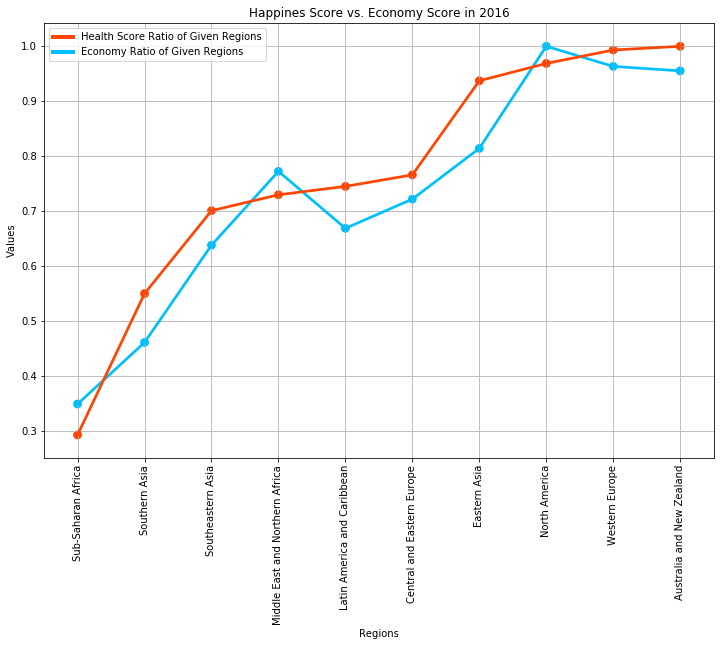

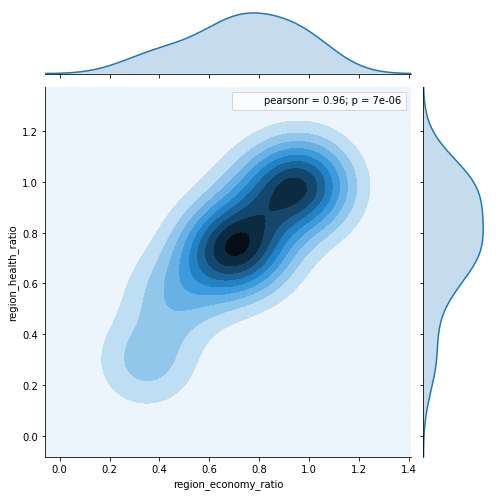

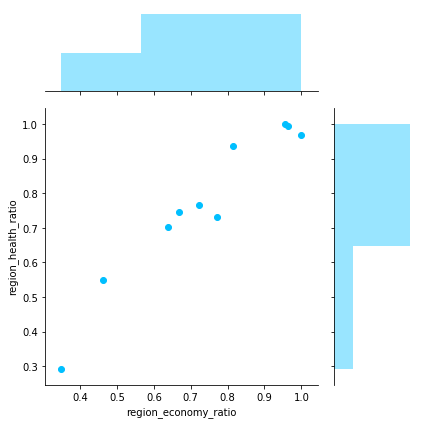

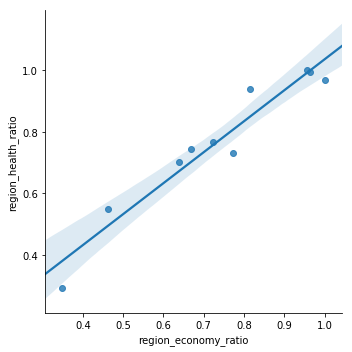

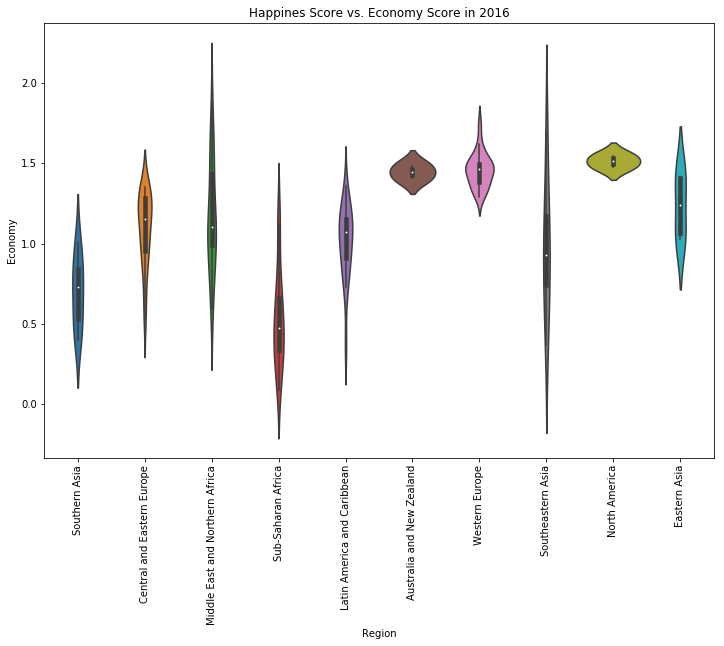

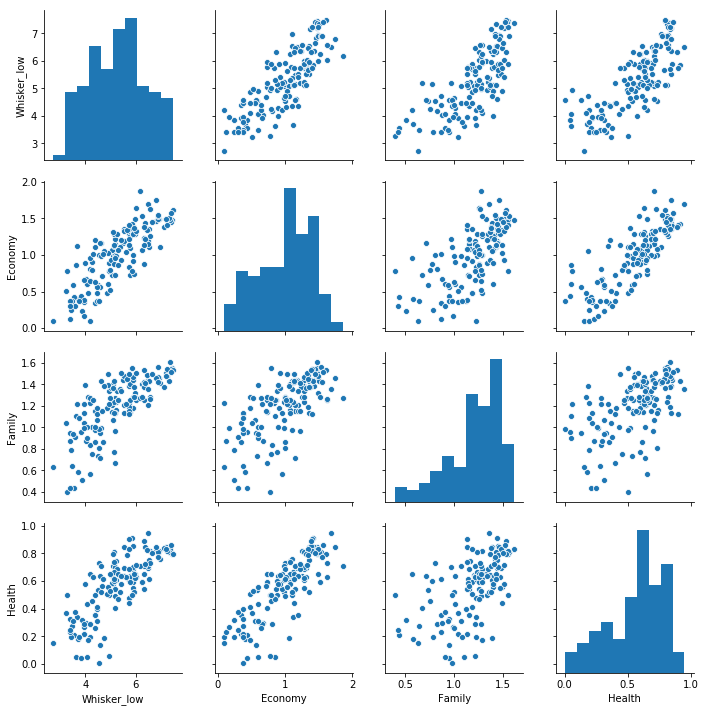

In [0]:
economy_health_ratio_plot(data_2018)

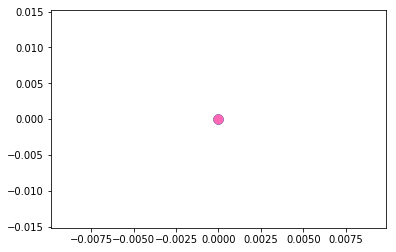

In [0]:
region_colors = {'Australia and New Zealand':'red',
                 'North America':'salmon',
                 'Western Europe':'goldenrod',
                 'Latin America and Caribbean':'yellowgreen',
                 'Eastern Asia':'mediumseagreen',
                 'Southeastern Asia':'darkcyan',
                 'Central and Eastern Europe':'deepskyblue',
                 'Middle East and Northern Africa':'royalblue',
                 'Southern Asia':'mediumorchid',
                 'Sub-Saharan Africa':'hotpink'
}

type(region_colors)
colors = []
for i in data_2018['Region']:
    colors.append(region_colors[i])

custom_points = [plt.scatter([0], [0], color="red", lw=4),
                plt.scatter([0], [0], color="salmon", lw=4),
                plt.scatter([0], [0], color="goldenrod", lw=4),
                plt.scatter([0], [0], color="yellowgreen", lw=4),
                plt.scatter([0], [0], color="mediumseagreen", lw=4),
                plt.scatter([0], [0], color="darkcyan", lw=4),
                plt.scatter([0], [0], color="deepskyblue", lw=4),
                plt.scatter([0], [0], color="royalblue", lw=4),
                plt.scatter([0], [0], color="mediumorchid", lw=4),
                plt.scatter([0], [0], color="hotpink", lw=4)]
region_list =  ['Australia and New Zealand', 'North America', 'Western Europe','Latin America and Caribbean',
                           'Eastern Asia','Southeastern Asia','Central and Eastern Europe',
                           'Middle East and Northern Africa','Southern Asia','Sub-Saharan Africa']


In [0]:
# Different factors 
def corelation_babbles(data, factor1, factor2):
  plt.clf()
  plt.figure(figsize=(20,10))
  plt.scatter(data[factor1], data[factor2], s=(data['Happiness_Score']**4), alpha=0.5, c=colors)
  plt.grid(True)
  plt.legend()
  plt.xlabel(factor1)
  plt.ylabel(factor2)



  plt.legend(custom_points,region_list)
  plt.title("{} {} graph with sizes as Happiness score and colors as Region".format(factor2,factor1) , fontsize=18)

  plt.show()

<Figure size 432x288 with 0 Axes>

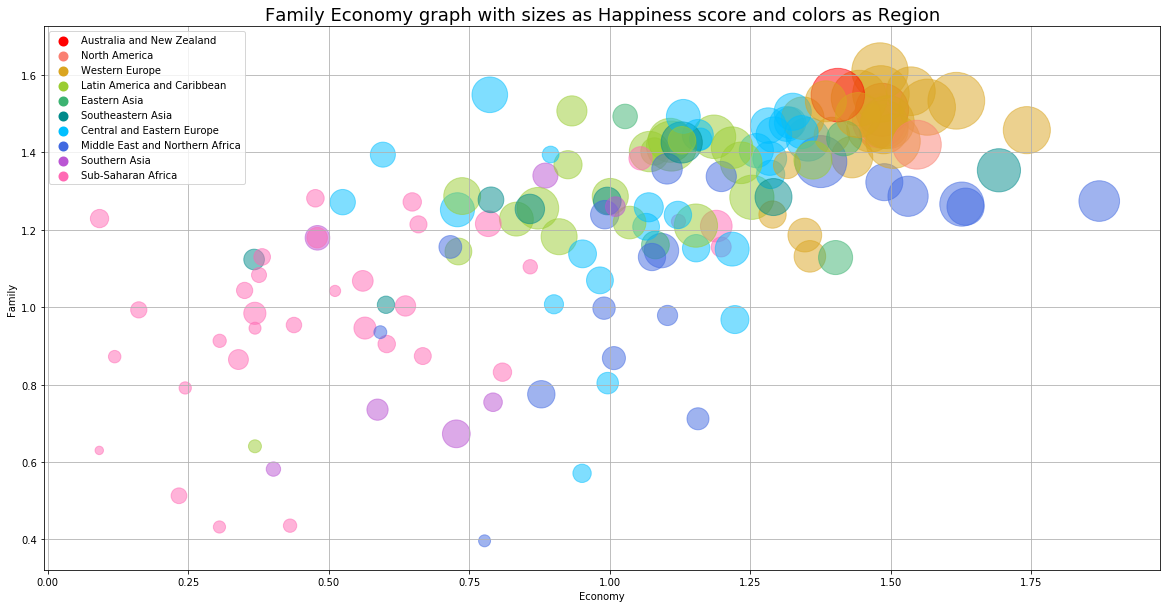

<Figure size 432x288 with 0 Axes>

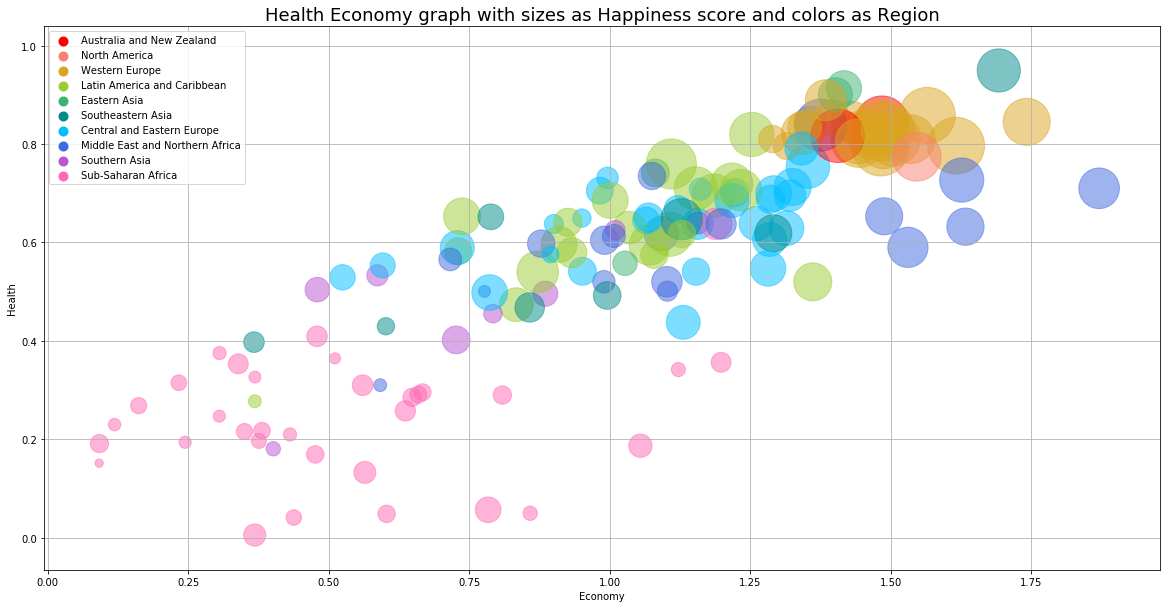

<Figure size 432x288 with 0 Axes>

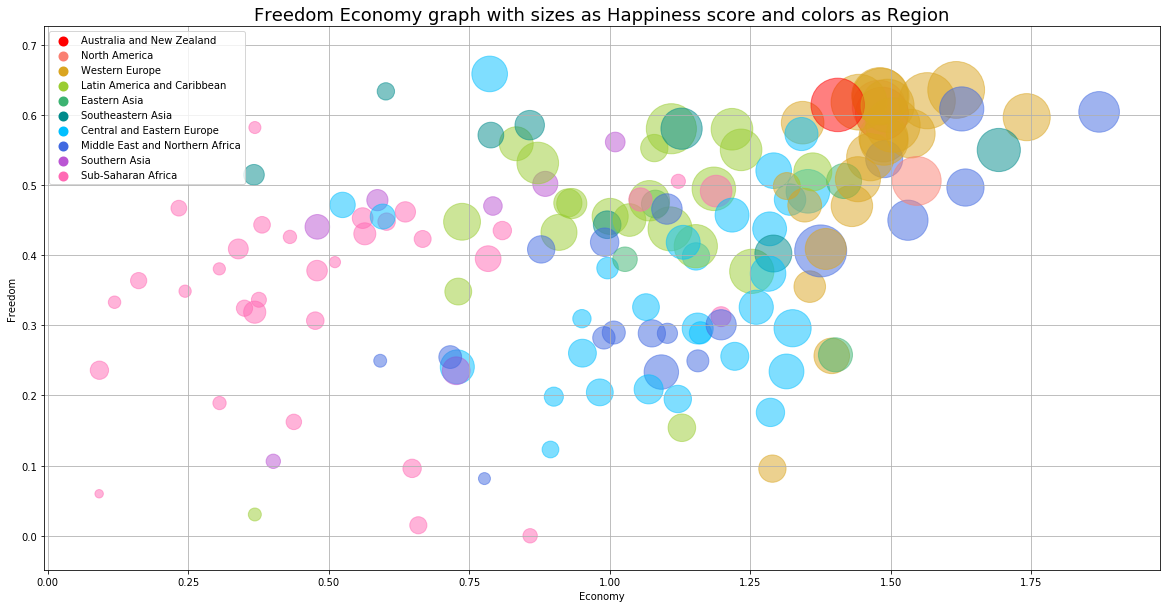

<Figure size 432x288 with 0 Axes>

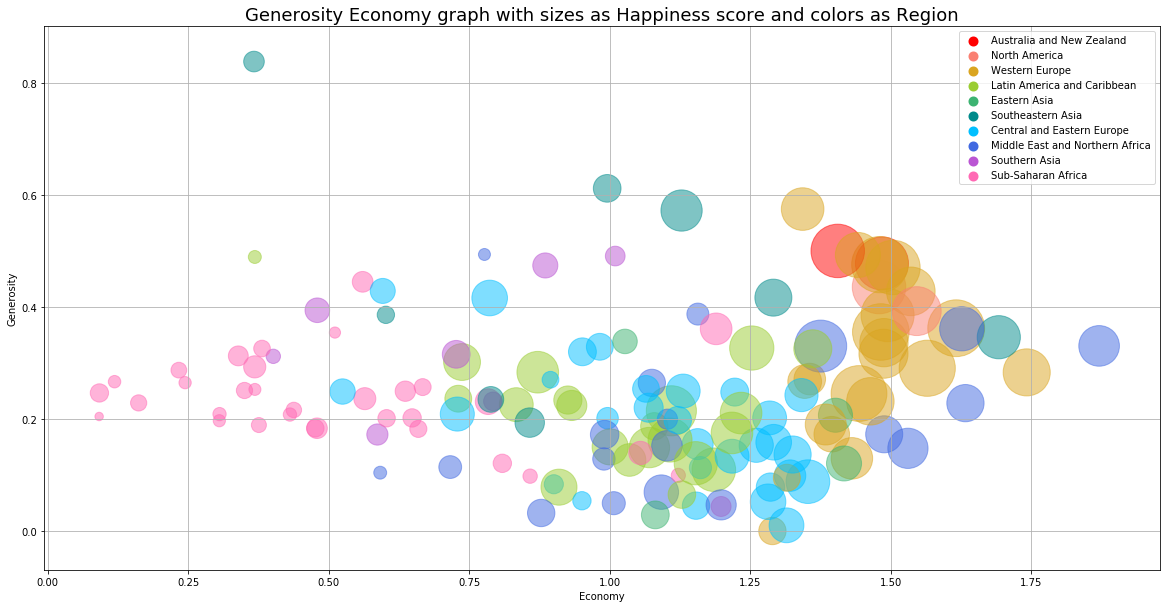

<Figure size 432x288 with 0 Axes>

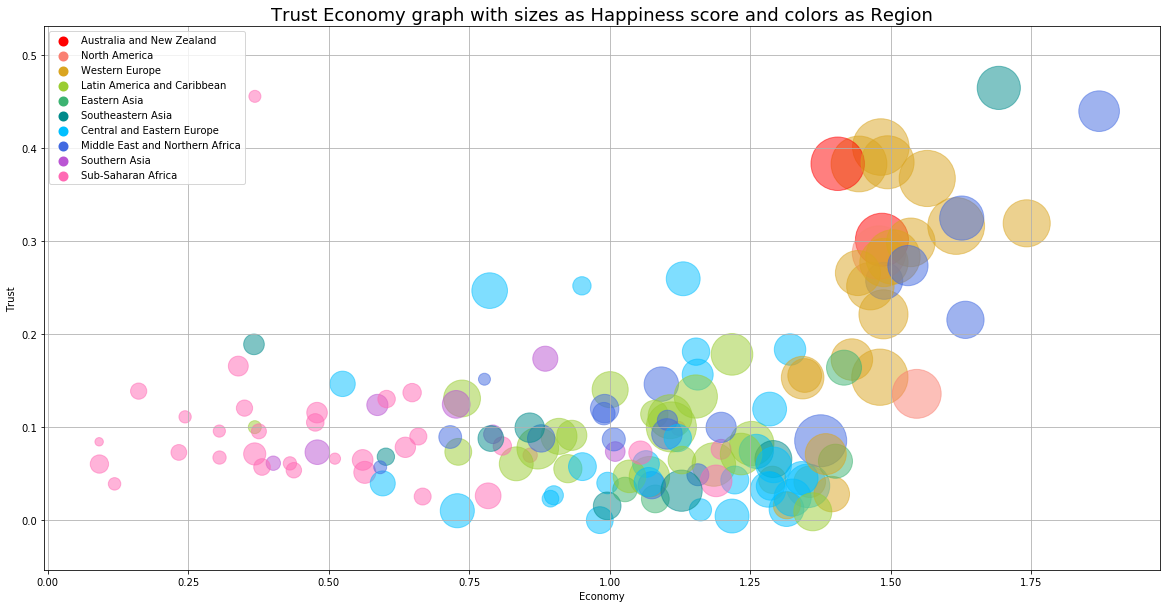

<Figure size 432x288 with 0 Axes>

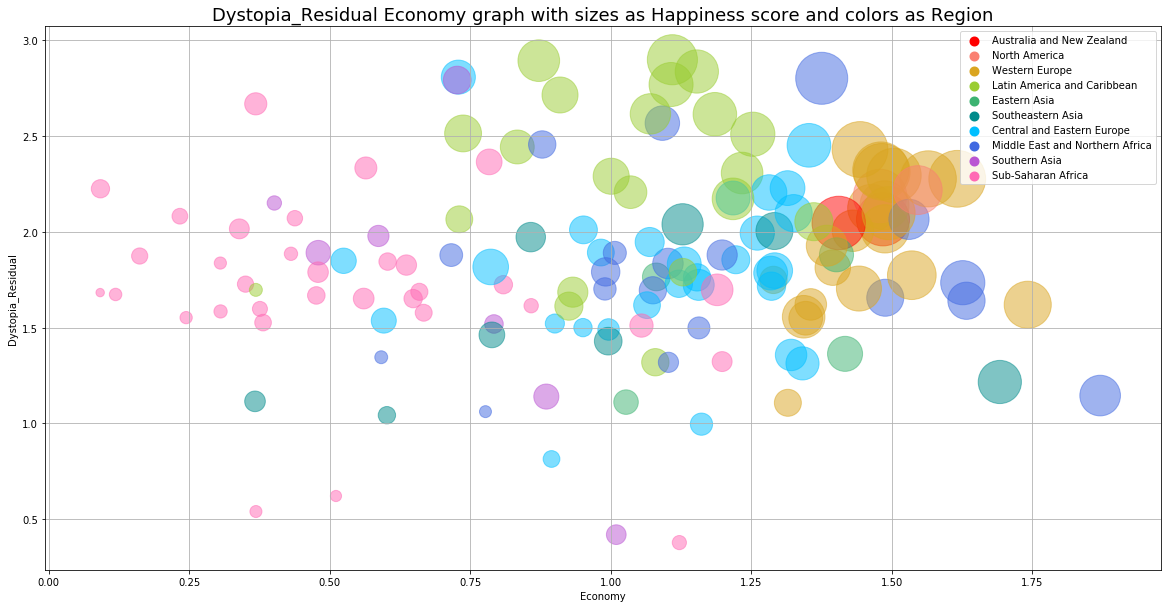

<Figure size 432x288 with 0 Axes>

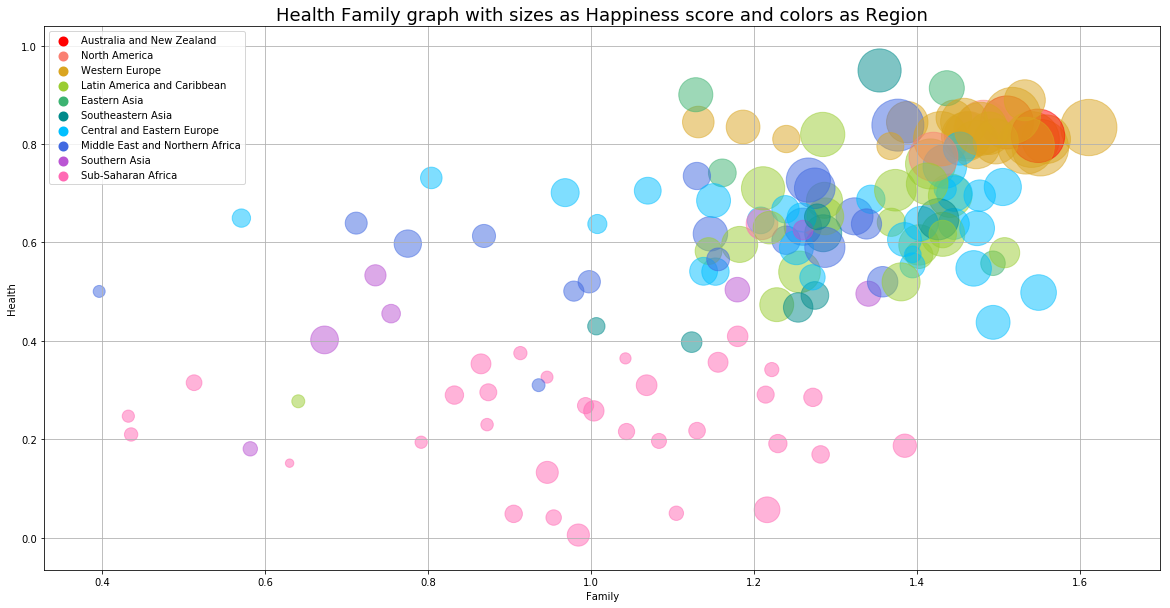

In [0]:
corelation_babbles(data_2018,'Economy','Family')
corelation_babbles(data_2018,'Economy','Health')
corelation_babbles(data_2018,'Economy','Freedom')
corelation_babbles(data_2018,'Economy','Generosity')
corelation_babbles(data_2018,'Economy','Trust')
corelation_babbles(data_2018,'Economy','Dystopia_Residual')
corelation_babbles(data_2018,'Family','Health')

## Factors affect happiness score in different region (pie chart)

In [0]:
region

In [0]:

#Horizontal bar plot
region_lists=list(data_2018['Region'].unique())
share_economy=[]
share_family=[]
share_health=[]
share_freedom=[]
share_trust=[]
share_dystopia=[]
for each in region_lists:
    region=data_2018[data_2018['Region']==each]
    share_economy.append(sum(region.Economy)/len(region))
    share_family.append(sum(region.Family)/len(region))
    share_health.append(sum(region.Health)/len(region))
    share_freedom.append(sum(region.Freedom)/len(region))
    share_trust.append(sum(region.Trust)/len(region))
    share_dystopia.append(sum(region.Dystopia_Residual)/len(region))
    
#Visualization
f,ax = plt.subplots(figsize = (12,6))
sns.set_color_codes("pastel")
sns.barplot(x=share_dystopia,y=region_lists,color='violet',label="Dystopia Residual")
sns.barplot(x=share_economy,y=region_lists,color='g',label="Economy")
sns.barplot(x=share_family,y=region_lists,color='b',label="Family")
sns.barplot(x=share_health,y=region_lists,color='c',label="Health")
sns.barplot(x=share_freedom,y=region_lists,color='y',label="Freedom")
sns.barplot(x=share_trust,y=region_lists,color='r',label="Trust")

ax.legend(loc="lower right",frameon = True)
ax.set(xlabel='Percentage of Region', ylabel='Region',title = "Factors affecting happiness score")
plt.show()

## Percentage of happiness score according to years 

In [0]:
data_2016['Year']=2016
data_2017['Year']=2017
data_2018['Year']=2018
data_concat=pd.concat([data_2016,data_2017,data_2018],axis=0,sort = False)
df=pd.pivot_table(data_concat, index = 'Year', values="Happiness_Score")
df

In [0]:
f,ax = plt.subplots(figsize =(20,10))
sns.boxplot(x="Year" , y="Happiness_Score", hue="Region",data=data_concat,palette="husl",ax=ax)
plt.show()

## World map of economy (map)

In [0]:
import time                          # To time processes 
import warnings                      # To suppress warnings
import matplotlib.pyplot as plt      # For Graphics
import seaborn as sns
from sklearn import cluster, mixture # For clustering 
from sklearn.preprocessing import StandardScaler

import plotly 
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
%matplotlib inline
plotly.offline.init_notebook_mode(connected=True)
warnings.filterwarnings('ignore')

plotly.__version__


In [0]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))

In [0]:
configure_plotly_browser_state()
init_notebook_mode(connected=False)
data = dict(type = 'choropleth', 
           locations = data_2018['Country'],
           locationmode = 'country names',
           z = data_2018['Economy'], 
           text = data_2018['Country'],
           colorbar = {'title':'Economy'})
layout = dict(title = 'Global Economy Score',
              width=1000,
              height=1000, 
             geo = dict(showframe = False,                         
                        projection = {'type': 'mercator'}))
choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

## World map of happiness (map)

In [0]:

configure_plotly_browser_state()
init_notebook_mode(connected=False)
data = dict(type = 'choropleth', 
           locations = data_2018['Country'],
           locationmode = 'country names',
           z = data_2018['Happiness_Score'], 
           text = data_2018['Country'],
           colorbar = {'title':'Happiness'})
layout = dict(title = 'Global Happiness Score',
              width=1000,
              height=1000, 
             geo = dict(showframe = False,
                        projection = {'type': 'mercator'}))
choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)